# INTRODUCTION

## Importing Required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from itertools import combinations
from scipy.stats import ttest_ind  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.metrics import calinski_harabasz_score


## Data Loading and Initial Exploration

**Red Wine Dataset**

In [6]:
red_wine_data = pd.read_csv('winequality-red.csv', delimiter=';')

The delimiter is specified as the file uses separation with the ';' character.   

In [8]:
num_red_wines = red_wine_data.shape[0]  
num_red_indicators = red_wine_data.shape[1]  
missing_red_values = red_wine_data.isnull().sum().sum()   
print(f"Number of wines: {num_red_wines}")
print(f"Number of indicators: {num_red_indicators}")
print(f"Missing values in the dataset: {missing_red_values}")

Number of wines: 1599
Number of indicators: 12
Missing values in the dataset: 0


In [9]:
# If we wish to further inspect the data: 
print('A few rows of the dataset:')
print(red_wine_data.head())
print('Inspecting the columns:')
print(red_wine_data.info())

A few rows of the dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8     

If we run the above section, we could confirm that there are 12 columns with the named features, each containing 1599 sample entries. 1 of these seems as of integer data type, while the rest are floats. The integer type use in wine quality feature may be related to rating of a qualitative feature e.g. taste or an overall quality grade depending on several factors. 

In [11]:
# numerical summary:
red_numerical_summary = red_wine_data.describe()
print(red_numerical_summary)

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

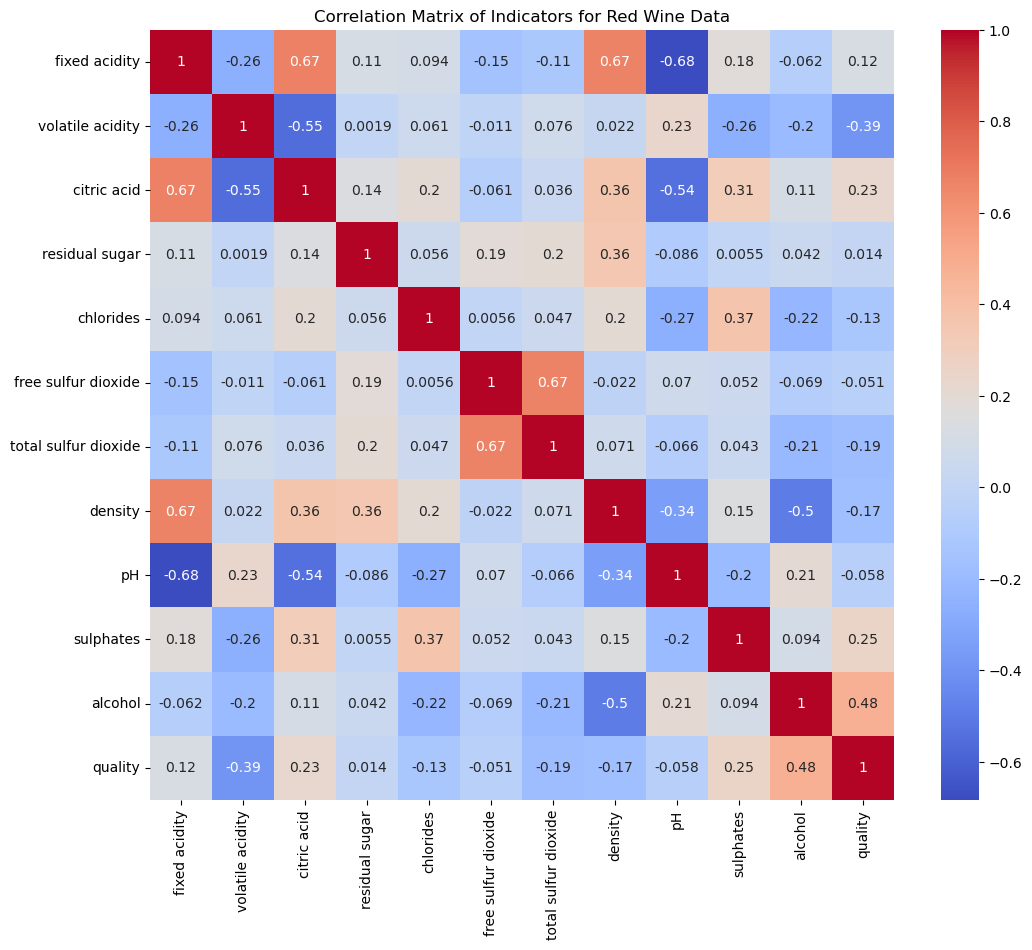

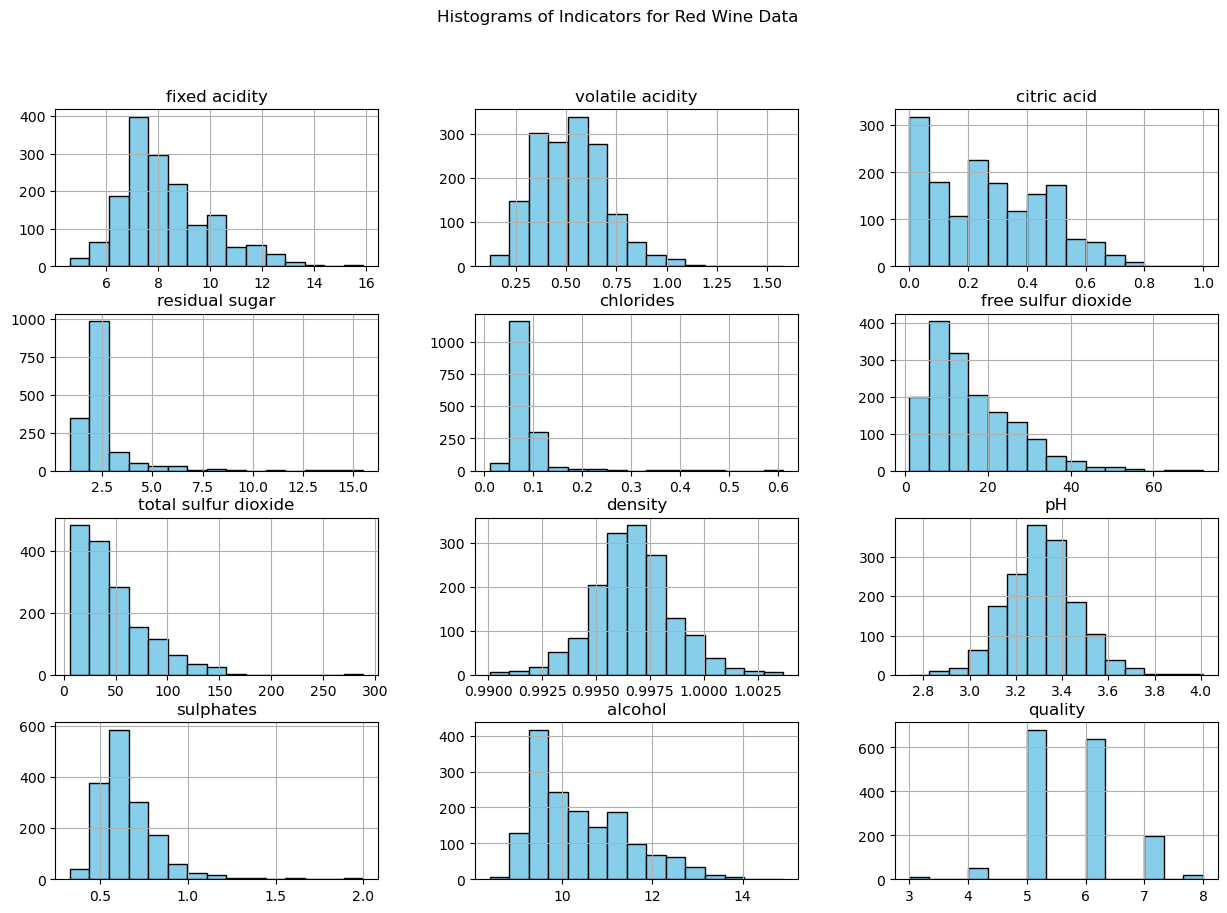

Boxplots of features:


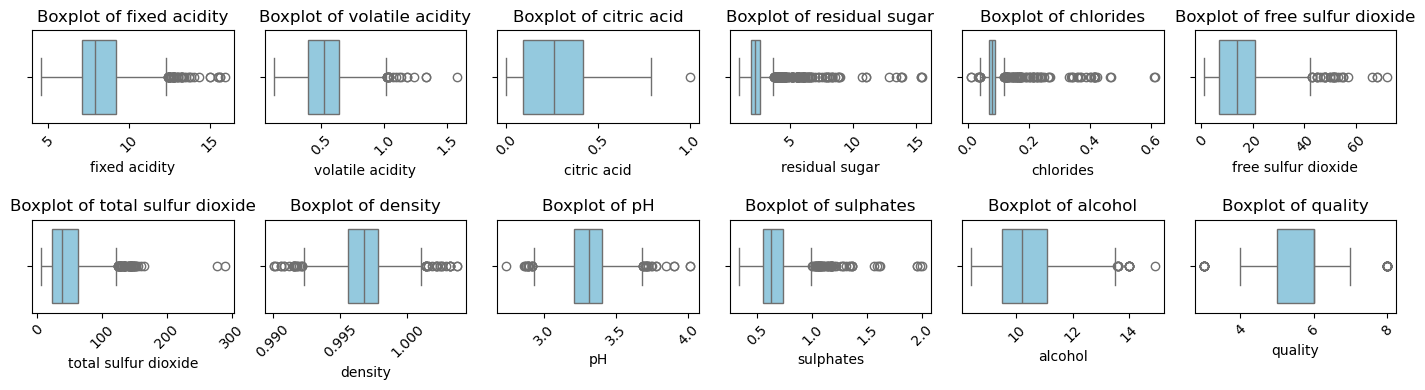

Scatter plots of selected features:


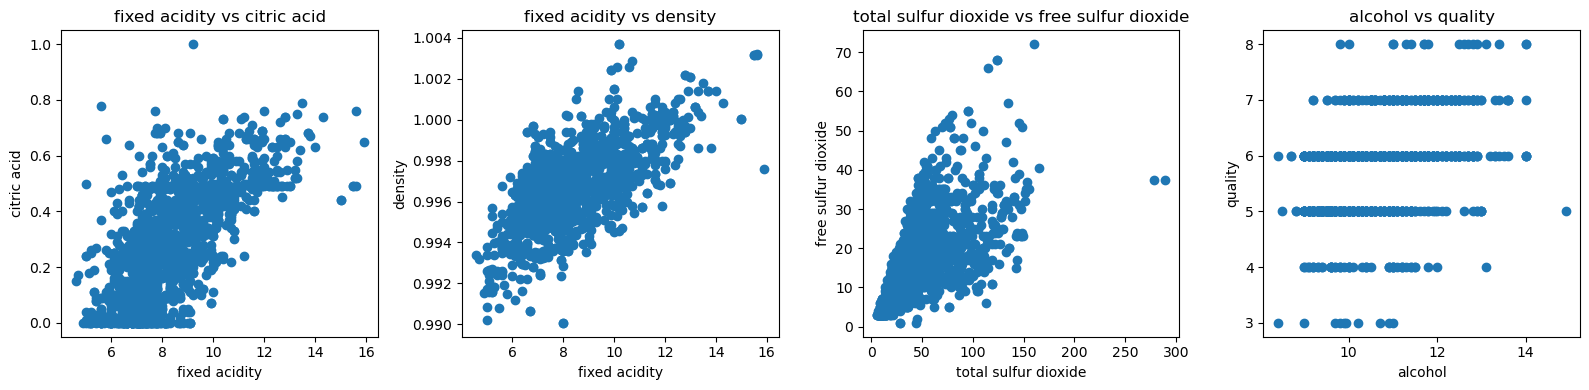

In [12]:
# graphical summary:

# Plotting correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = red_wine_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Indicators for Red Wine Data")
plt.show()

# Plotting histograms for numerical features
red_wine_data.hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Indicators for Red Wine Data")
plt.show()


# Creating a boxplot for each feature
print('Boxplots of features:')
features_to_plot = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
                    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 
                    'density', 'pH', 'sulphates', 'alcohol', 'quality']

plt.figure(figsize=(14, 4))  
for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 6, i + 1)  
    sns.boxplot(data=red_wine_data, x=feature, color='skyblue')
    plt.title(f'Boxplot of {feature}')
    plt.xticks(rotation=45)  # Rotate labels for better readability

# Adjusting the layout to avoid any overlap
plt.tight_layout()
# Showing the plots
plt.show()


# Scatter plots of a few selected features which looked related on correlation matrix 
print('Scatter plots of selected features:')
scatter_pairs = [
    ('fixed acidity', 'citric acid'),
    ('fixed acidity', 'density'),
    ('total sulfur dioxide', 'free sulfur dioxide'),
    ('alcohol', 'quality')
]

fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for ax, (x_feature, y_feature) in zip(axes, scatter_pairs):
    ax.scatter(red_wine_data[x_feature], red_wine_data[y_feature])
    ax.set_title(f'{x_feature} vs {y_feature}')
    ax.set_xlabel(x_feature)
    ax.set_ylabel(y_feature)

plt.tight_layout()
plt.show()


Looking at the numerical summary, we can see detailed info of 12 parameters in the dataset based on the number of samples (1599 for each) and their mean, std and variance. As their min and max values highly differ (e.g. in fixed acidity, sulfur dioxide, residual sugar), we can expect that dataset have quite different samples, which can be analyzed further with other methods.    

In the graphical summary, by the correlations plot, we can see that some of the variables which has a high positive or negative corr. value may be related to each other, e.g. citric acid vs fixed acidity, density vs fixed acidity, pH vs fixed acidity, total vs free sulfur dioxide, etc. 
In the histograms, we can see some qine quality parameters are following spreading trends which are closer to gaussian and symmetrical shape such as density, pH, fixed acidity, volatile acidity, sulphates. On the other hand, the other variables have significantly more samples either in the left side or central part (e.g. a lot more average-quality samples than very low and very high, a lot more low-residual sugar samples than the higher ones). 
According to the boxplots, some samples might have a lot of outliers (e.g. in residual sugar, chlorides, etc) however this shouldn't be completely relied on as it may be because of the normal features of the samples and indicators. Though, special samples could be searched within outlier points of some of the idicators. On the other hand, boxplots of citric acid and alcohol seem to be nicely representing and visualizing the indicators. Most samples have an alcohol content betwen 9.5-11%, though the entire spead is larger. Lastly, some significant relationships which were seen in the correlatoin plots were represented in the scatter plots. It can be told that, fixed acidity vs citric acid and fixed acidity vs density might be mostly increasing with each other's increasing value. The same thing could be slightly seen also at alcohol vs quality, however, as quality is not a continuous variable, it is more difficult to spot.   


__White Wine Dataset__

In [15]:
white_wine_data = pd.read_csv('winequality-white.csv', delimiter=';')

In [16]:
num_white_wines = white_wine_data.shape[0]
num_white_indicators = white_wine_data.shape[1] 

# Checking if indicators match the red wine dataset:
same_indicators = list(red_wine_data.columns) == list(white_wine_data.columns)

# Outputs:
print(f"Number of white wines: {num_white_wines}")
print(f"Number of indicators: {num_white_indicators}")
print(f"Are indicators the same as red wine? {'Yes' if same_indicators else 'No'}")


Number of white wines: 4898
Number of indicators: 12
Are indicators the same as red wine? Yes


In [17]:
# If we wish to further inspect the data, we could run the below codes: 
print('A few rows of the dataset:')
print(white_wine_data.head())
print('Inspecting the columns:')
print(white_wine_data.info())

A few rows of the dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5     

If we run the above code, we could confirm that there are 12 columns with the same named features as they were in the other (red wine data) dataset. Each indicator contains 4898 sample entries, same data types for each indicator, as the case of previous (red wine data) dataset. 

# EXPLORATORY DATA ANALYSIS (EDA)

## Statistical Tests

In [21]:
columns_to_test = [col for col in red_wine_data.columns]

t_test_results = []
for col in columns_to_test:
    t_score, p_value = ttest_ind(red_wine_data[col], white_wine_data[col], equal_var=False)  
    t_test_results.append((col, t_score, p_value))

print('Comparison of the red and white wine datasets with a t-test:')
print(f"{'Indicator':<20} {'T-Score':<10} {'P-Value':<10} {'Conclusion':<10}")
for col, t_score, p_value in t_test_results:
    conclusion = 'Significant' if p_value < 0.01 else 'Not Significant'
    print(f"{col:<20} {t_score:<10.4f} {p_value:<10.4f} {conclusion}")


Comparison of the red and white wine datasets with a t-test:
Indicator            T-Score    P-Value    Conclusion
fixed acidity        32.4227    0.0000     Significant
volatile acidity     53.0591    0.0000     Significant
citric acid          -12.2290   0.0000     Significant
residual sugar       -47.8022   0.0000     Significant
chlorides            34.2402    0.0000     Significant
free sulfur dioxide  -54.4279   0.0000     Significant
total sulfur dioxide -89.8721   0.0000     Significant
density              42.7085    0.0000     Significant
pH                   27.7755    0.0000     Significant
sulphates            37.0559    0.0000     Significant
alcohol              -2.8590    0.0043     Significant
quality              -10.1494   0.0000     Significant


According to the p-val results, we can see all of the indicators significantly differ between red and white wines. 
The positive signed T-scores show that those indicators (avg. value for e.g. fixed acidity, chlorides, etc) are higher in red wine samples while negative signed ones (avg. values for e.g. total sulfur dioxide, residual sugar, etc) are higher in white wine samples. 
The two wine types are statistically different than each other by all the indicators. 
The highes p-val, for alcohol, which has also the lowest magnitude of T-score, may be the least strong evidence against the null hypothesis (that the wine types are not similar), however, even this indicator is statistically significant to be different between two groups.  

## Visual Analysis

Boxplot Comparison:


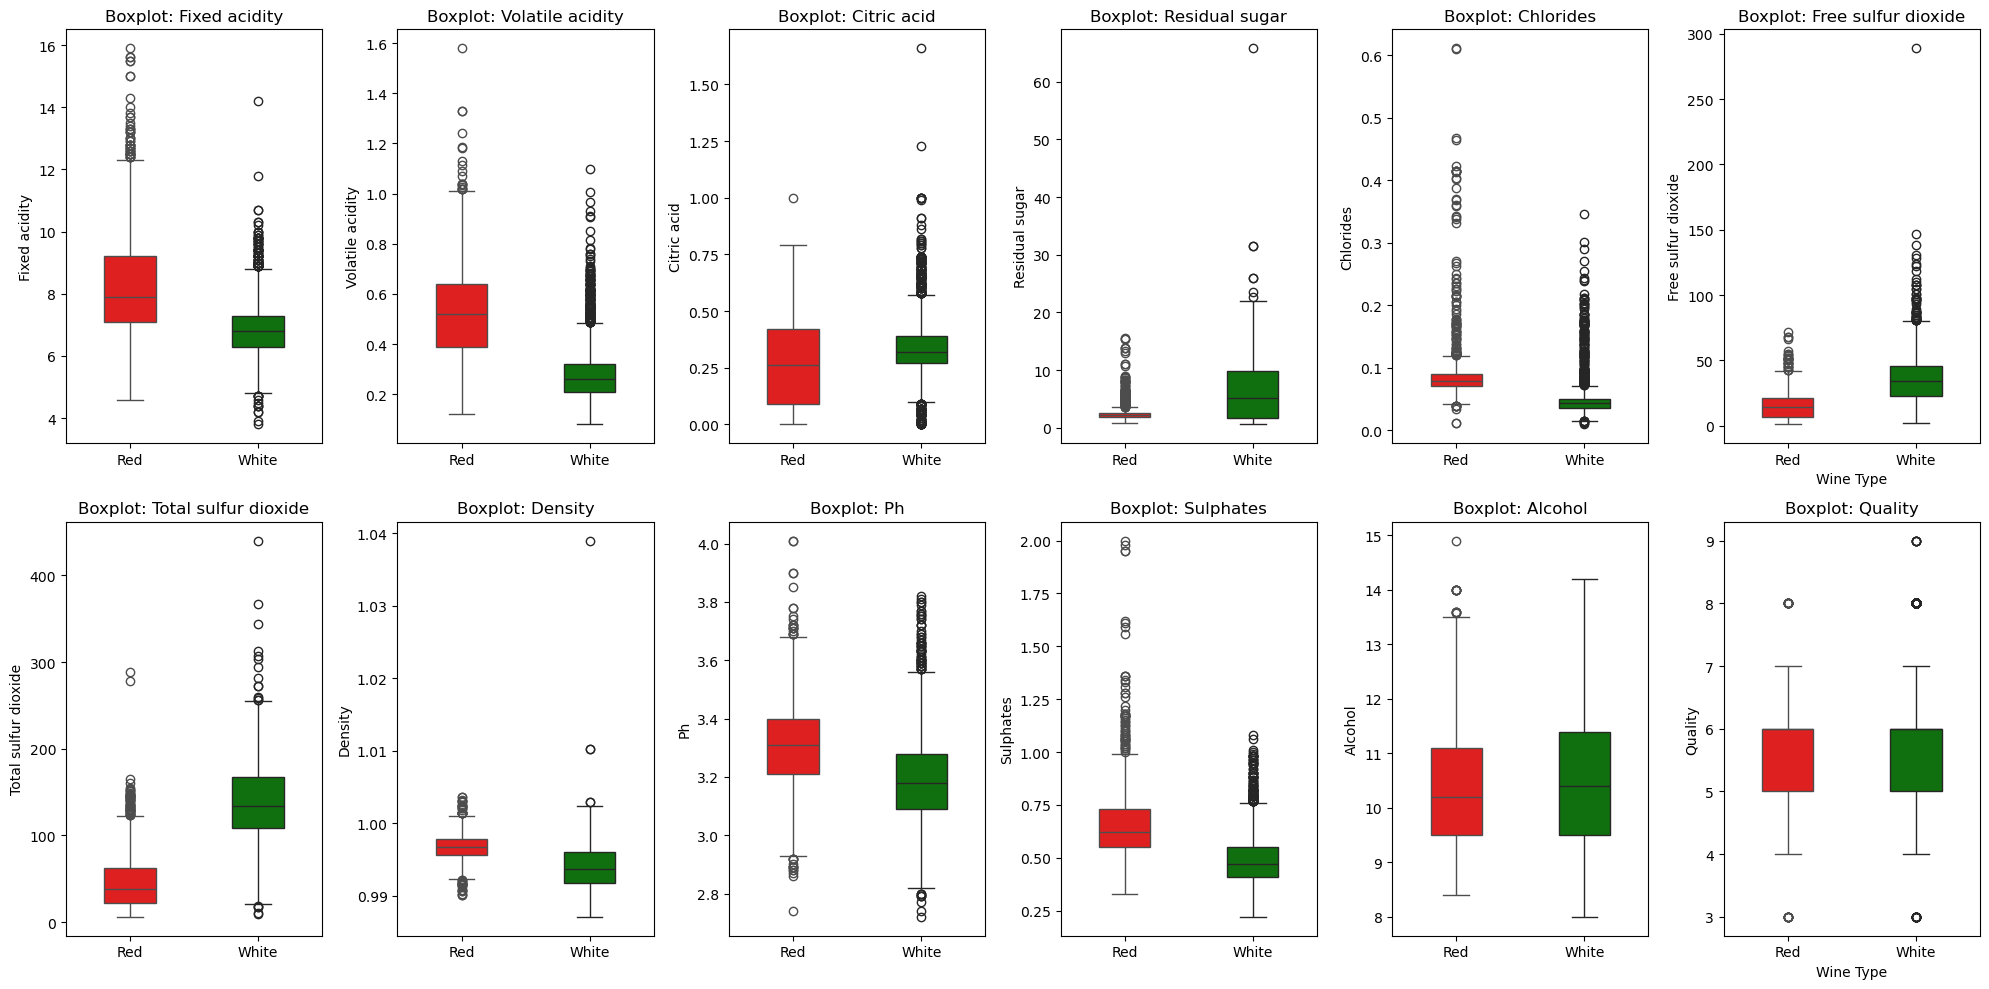

Histogram Comparison:


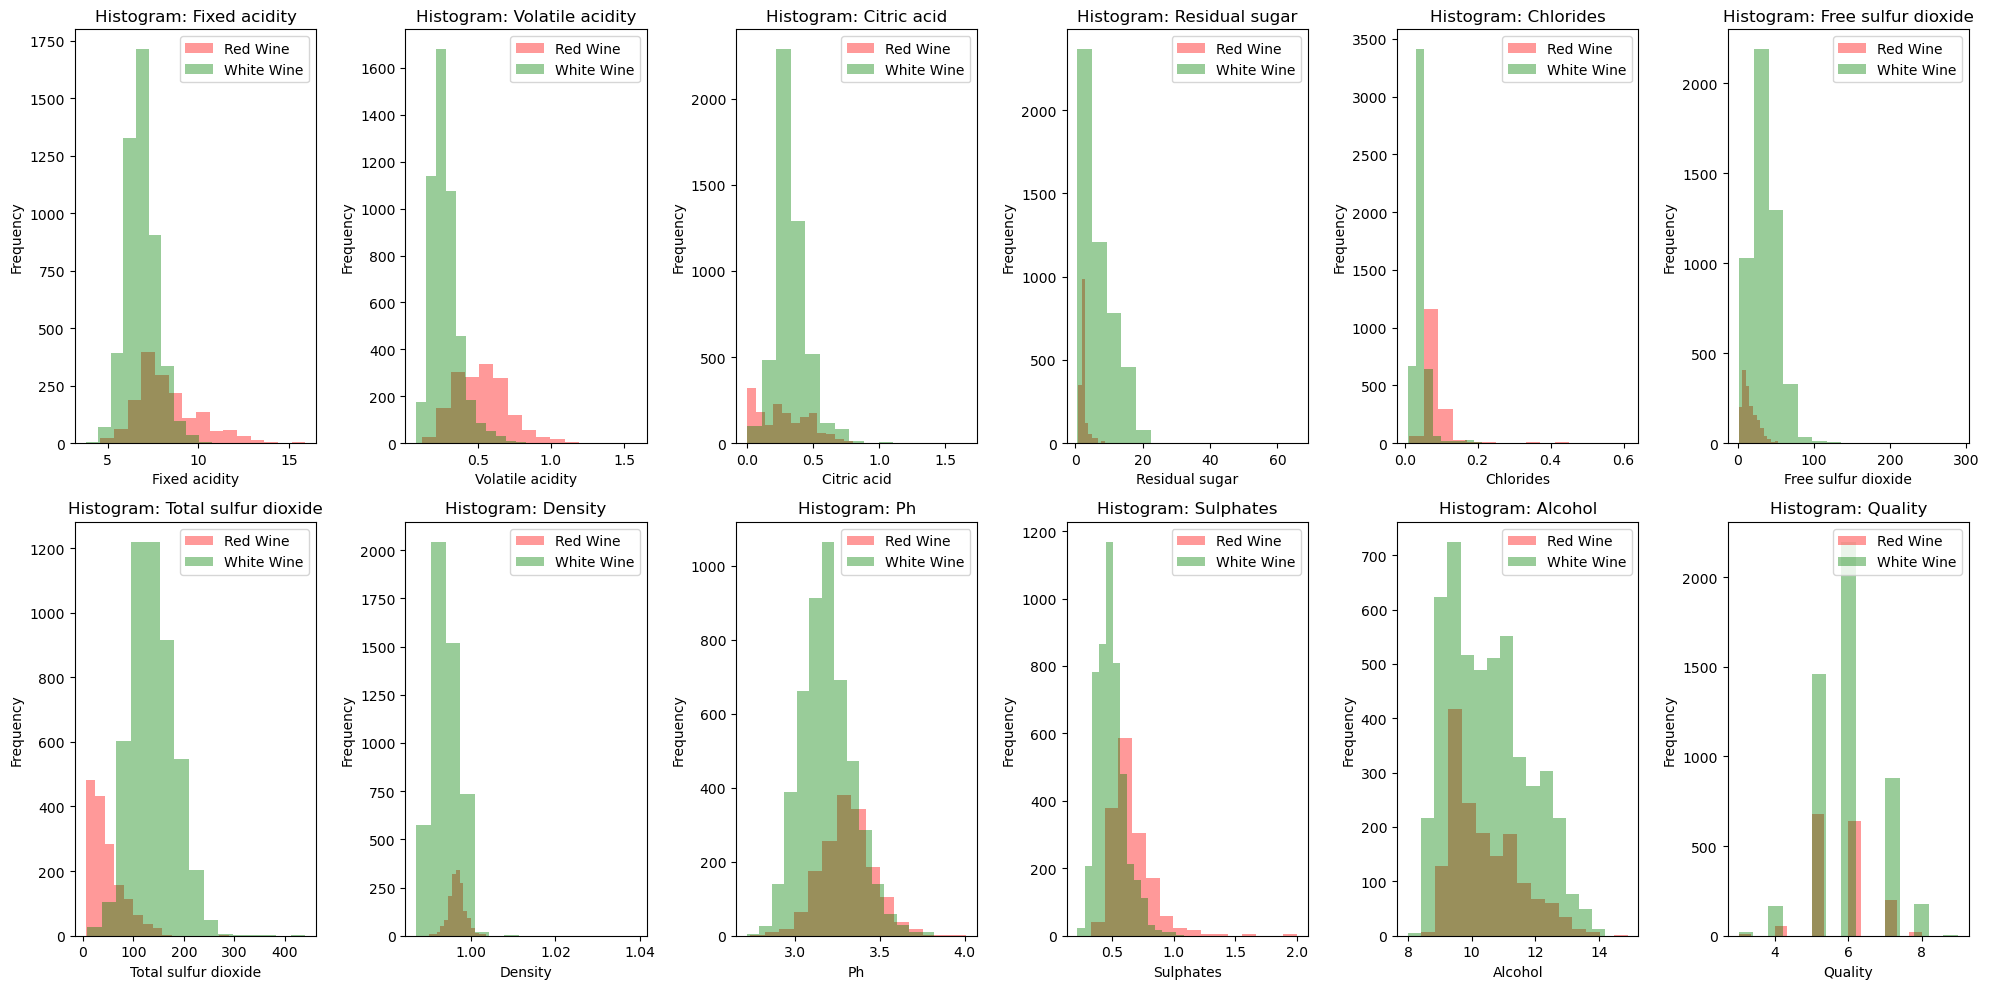

Density Plot Comparison:


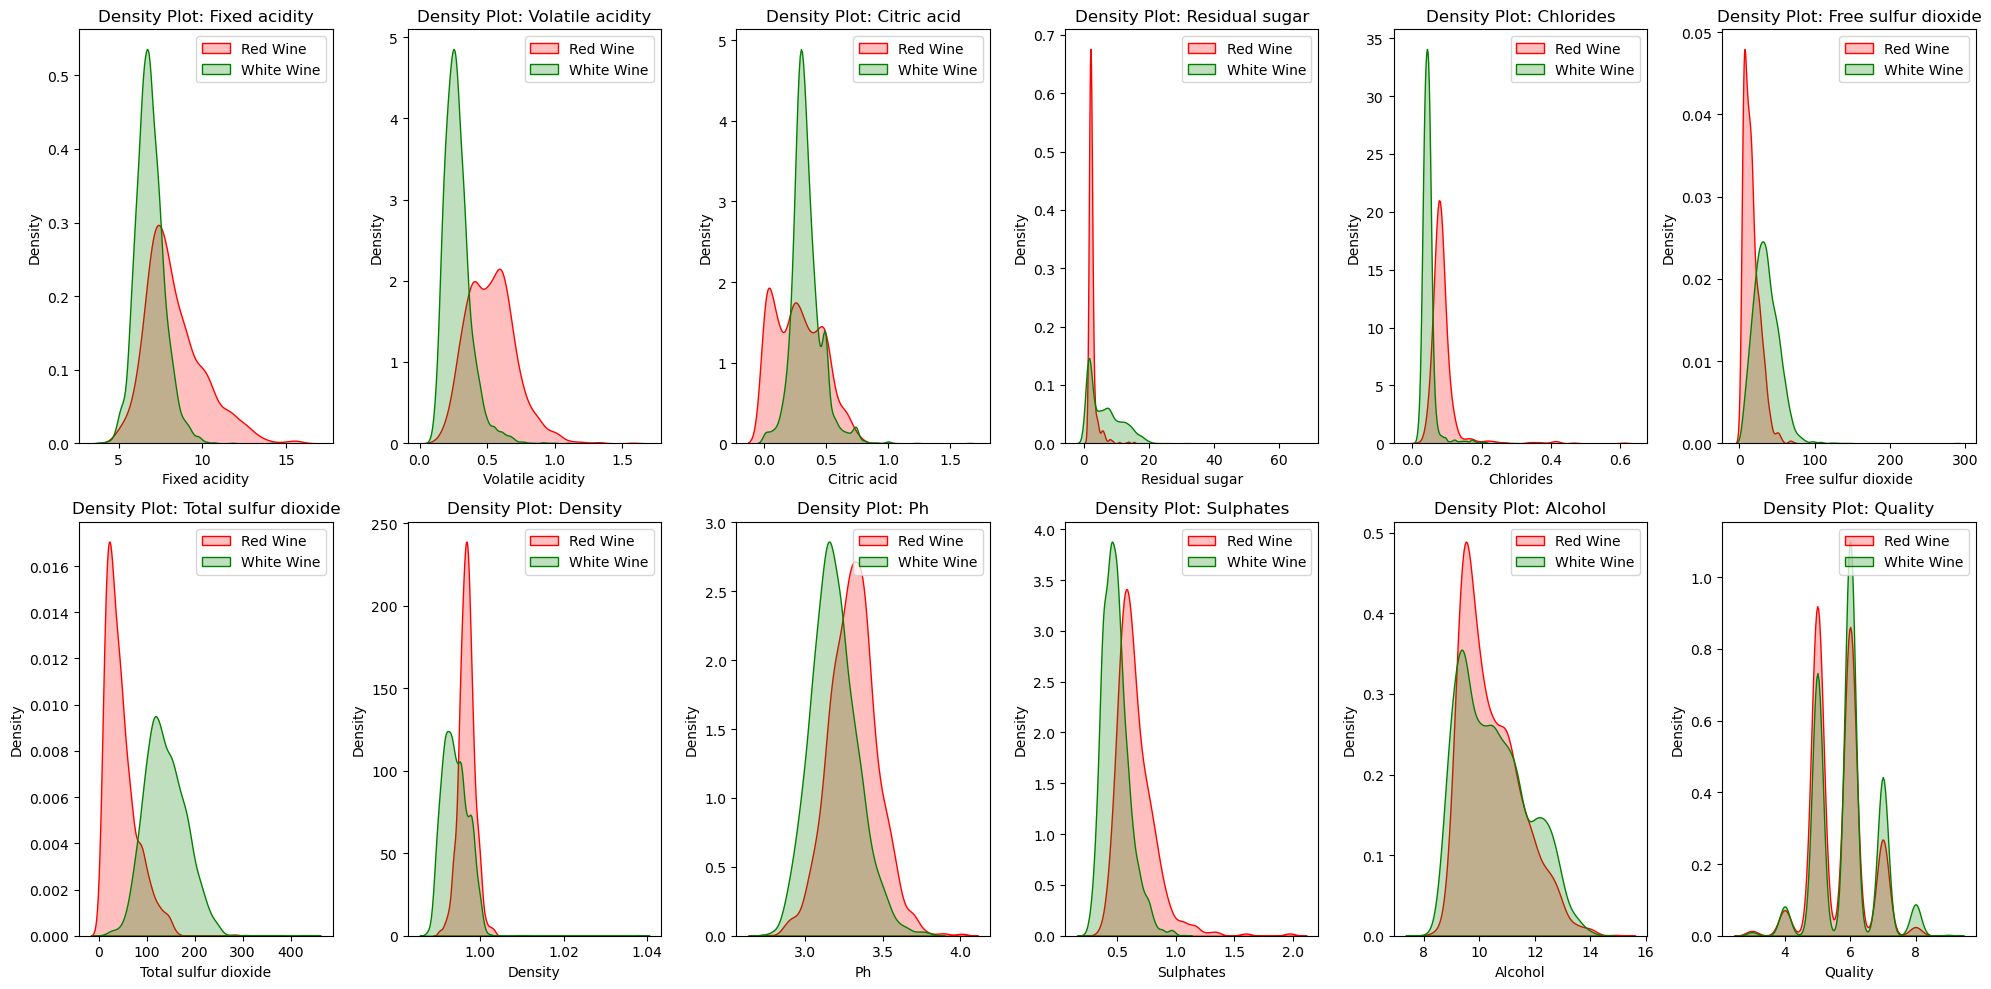

In [24]:
indicators = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
              'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 
              'pH', 'sulphates', 'alcohol', 'quality']

fig, axes = plt.subplots(2, 6, figsize=(20, 10))
axes = axes.flatten() 

print('Boxplot Comparison:')
for idx, indicator in enumerate(indicators):
    ax = axes[idx]
    
    sns.boxplot(x='wine_type', y=indicator, data=red_wine_data.assign(wine_type='Red'), ax=ax, color='red', width=0.4)
    sns.boxplot(x='wine_type', y=indicator, data=white_wine_data.assign(wine_type='White'), ax=ax, color='green', width=0.4)
    ax.set_title(f'Boxplot: {indicator.capitalize()}')
    ax.set_xlabel('')
    ax.set_ylabel(indicator.capitalize())
    
    if idx % 6 == 5:
      ax.set_xlabel('Wine Type')

plt.tight_layout()
plt.show()


print('Histogram Comparison:')
fig, axes = plt.subplots(2, 6, figsize=(20, 10))
axes = axes.flatten()

for idx, indicator in enumerate(indicators):
    ax = axes[idx]
    
    ax.hist(red_wine_data[indicator], bins=15, alpha=0.4, label='Red Wine', color='red')
    ax.hist(white_wine_data[indicator], bins=15, alpha=0.4, label='White Wine', color='green')
    ax.set_title(f'Histogram: {indicator.capitalize()}')
    ax.set_xlabel(indicator.capitalize())
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()
plt.show()


print('Density Plot Comparison:')
fig, axes = plt.subplots(2, 6, figsize=(20, 10))
axes = axes.flatten()

for idx, indicator in enumerate(indicators):
    ax = axes[idx]

    sns.kdeplot(red_wine_data[indicator], fill=True, color='red', label='Red Wine', ax=ax)
    sns.kdeplot(white_wine_data[indicator], fill=True, color='green', label='White Wine', ax=ax)
    ax.set_title(f'Density Plot: {indicator.capitalize()}')
    ax.set_xlabel(indicator.capitalize())
    ax.set_ylabel('Density')
    ax.legend()

plt.tight_layout()
plt.show()


Looking at the boxplots, we can see that red wine tends to have a larger content of the fixed and volatile acidity, chlorides, density, pH and sulphates, according to both their medians and variances. Histograms and density plots confirm these findings. While citric acid median is slightly higher in white wine, teh spead of red wine is larger, exceeding even the max value of white wine data. Residual sugar may not be a good choice to compare with boxplots, as it has an extreme low side at red value but it is reprsented better at density plot and histogram. In case of free and total sulfur dioxide, white wine has significantly higher values of median and variance in the boxplots and likely higher content is also in agreement at boxplots and histograms. Also, even the smallest value for red wine surpasses the max value for the white wine at the corresponding quartile of the boxplots. In case of alcohol, white wine has slightly higher central tendency and slightly larger spread (which actually may be related to the more representative sampling strategy as there were significantly more white wine samples in the datasets). In case of quality, we can see boxplot show similar median and variance and the histogram and the density plot show similar trend between two sample groups. There are one outlier with poor quality at each wine type; 1 extraordinary good quality of red wine and two as the same in white wine.     

# DATASET INTEGRATION AND PREPROCESSING 

**Concatenation & Cleaning**

In [28]:
red_wine_data['WineType'] = 'Red'
white_wine_data['WineType'] = 'White'
combined_wine_data = pd.concat([red_wine_data, white_wine_data], ignore_index=True)

The indexes are overwritten for the White wine dataset which comes after the other one, by "ignore_index=True" as two datasets are merged. 
A new indicator is added, just to make it easier to verify the proper concatenation.

In [30]:
print(combined_wine_data.head()) # to verify by viewing the first few rows
print(combined_wine_data.tail()) # to verify by viewing the last few rows

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality WineType  
0      9.4        5      Red  
1      9.8        5     

**Note:**
After verifying that they are concatenated correctly, we can remove the WineType indicator, which was not really a part of the question:

In [32]:
combined_wine_data = combined_wine_data.drop(columns='WineType')

**Correlation Analysis & Plotting**

In [34]:
# Computing the Pearson correlation matrix:
correlation_matrix = combined_wine_data.corr()

# Unstacking the original correlation matrix and sorting by the absolute values to ensure that both strong positive and negative correlations appear:
correlation_pairs = correlation_matrix.unstack()

# Formatting the data
correlation_pairs = correlation_pairs[correlation_pairs != 1] # Removing the self correlations of variables (correlation = 1)
correlation_pairs.index = correlation_pairs.index.map(lambda x: tuple(sorted(x))) # Alphabatical ordering to get the duplicated values in order
correlation_pairs = correlation_pairs[~correlation_pairs.index.duplicated()] # Removing the duplicated pairs

# Getting the top 4 most strongly correlated pairs:
top_4_correlated_pairs = correlation_pairs.abs().sort_values(ascending=False).head(4)

print(f"Top 4 most strongly correlated pairs:\n{top_4_correlated_pairs}")

Top 4 most strongly correlated pairs:
free sulfur dioxide  total sulfur dioxide    0.720934
alcohol              density                 0.686745
density              residual sugar          0.552517
residual sugar       total sulfur dioxide    0.495482
dtype: float64


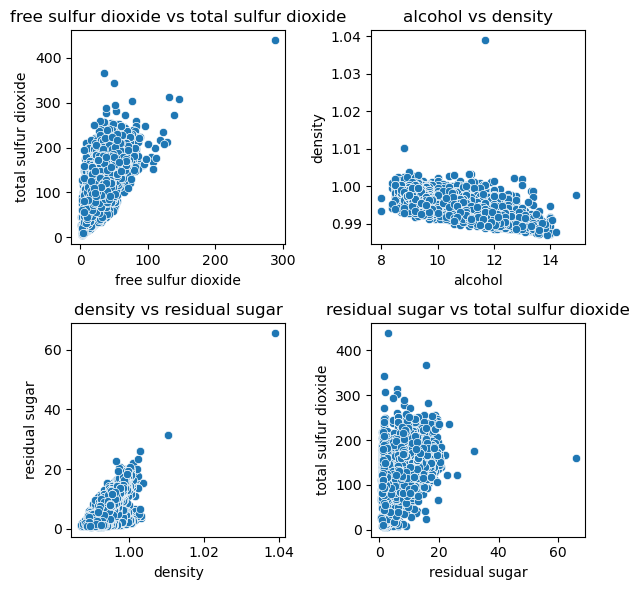

In [35]:
pairs = [
    ('free sulfur dioxide', 'total sulfur dioxide'),
    ('alcohol', 'density'),
    ('density', 'residual sugar'),
    ('residual sugar', 'total sulfur dioxide')
]

fig, axes = plt.subplots(2, 2, figsize=(6, 6))

axes = axes.flatten() # Flattening for easier indexing

# Adding scatter plots on each subplot from 1 to 4:
for i, (x_col, y_col) in enumerate(pairs):
    sns.scatterplot(data=combined_wine_data, x=x_col, y=y_col, ax=axes[i])
    axes[i].set_title(f'{x_col} vs {y_col}')
    axes[i].set_xlabel(x_col)
    axes[i].set_ylabel(y_col)

plt.tight_layout()

plt.show()


The strongest relation that appear in the scatter plots is in between free and total sulfur dioxide, although not a perfectly linear. This is as expected from the correlation plots. We can see their values increase together, which indicates a positive correlation. On the other hand, second most evident relationship looks to be in between density and alcohol, which is also as expected. We can see a downwards slope, which shows a negative correlation. In case of residual sugar vs density, we can see many sample values' increase at both indicators together, as a positive relation. We see a potential cluster in the right bottom corner, which could not be spotted without looking at the scatter plots. In total sulfur dioxide vs residual sugar plot, we can see a sharp upwards slope inclined more to y axis and potentially with positive correlation; this scatter plot seem less evident than the others, although there is still a visible relationship between these two indicators. This is not unexpected because the value of this correlation (0.4955) is not necessarily enough to be obvious.   

We can further confirm the signs of the correlations by viewing at the results of:

In [37]:
top_3_pos_correlated_pairs = correlation_pairs.sort_values(ascending=False).head(3)
top_3_neg_correlated_pairs = correlation_pairs.sort_values(ascending=True).head(3)
print(f"Top 3 most strongly positive correlated pairs:\n{top_3_pos_correlated_pairs}")
print(f"Top 3 most strongly negative correlated pairs:\n{top_3_neg_correlated_pairs}")

Top 3 most strongly positive correlated pairs:
free sulfur dioxide  total sulfur dioxide    0.720934
density              residual sugar          0.552517
residual sugar       total sulfur dioxide    0.495482
dtype: float64
Top 3 most strongly negative correlated pairs:
alcohol               density            -0.686745
total sulfur dioxide  volatile acidity   -0.414476
citric acid           volatile acidity   -0.377981
dtype: float64


Thus, it is certain that alcohol vs density had a negative strong correlation, while the other three relationships were positive correlations.  

# DATA TRANSFORMATION

**Creating a Binary Feature**

In [41]:
combined_wine_data['QualityCategory'] = combined_wine_data['quality'].apply(lambda x: 'POOR' if x <= 5 else 'GOOD')

The new created categorical column is named as 'QualityCategory' in the dataset.

In [43]:
# If we want to verify, we can run the below codes and display the first few rows:
print(combined_wine_data[['quality', 'QualityCategory']].head())

   quality QualityCategory
0        5            POOR
1        5            POOR
2        5            POOR
3        6            GOOD
4        5            POOR


**Preprocessing**

In [45]:
# Separating predictors (x) and the response (y) variable:
x = combined_wine_data.drop(columns=['quality', 'QualityCategory'])  # excluding quality in both numerical and categorical columns
y = combined_wine_data['quality']  #  numerical quality is the response variable

# Standardizing the predictor variables:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

**Discussion:**
10 features are identified as the best features by the forward selection: fixed acidity, volatile acidity, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, and alcohol. This is a very high number, indicating almost all of the features came as important. However, at the rgression model, among those features, chlorides has a high p-value (0.091), which means its coefficient is not significant. In addition, only 0.291 (R2) of the quality observations variability was explained in this regression model. 
In terms of the comparison with the previous model, chlorides was a statistically significant indicator in the previous model in Part 4.c. Also, the indicators with new negatively signed coefficients (volatile acidity, chlorides, total sulfur dioxide and density) which decrease the quality of wine as they increase were consistently negative signed also in the previous model in Part 4.c and there is no additional change in the signs.    

**5.a**

In [48]:
# Like in the previous section, separating predictors and responses again:
x = combined_wine_data.drop(columns=['quality', 'QualityCategory'])  
y = combined_wine_data['quality'] 

# Splitting the data into 75% training and 25% test sets:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=101)

# Checking the size of the training and test sets, to verify the division:
print(f"Training set size: {x_train.shape[0]}")
print(f"Test set size: {x_test.shape[0]}")

Training set size: 4872
Test set size: 1625


**5.b**

In [50]:
# Initializing a Random Forest model with 10 trees:
rf_model = RandomForestRegressor(n_estimators=10, random_state=101)

# Fitting the model on the training dataset:
rf_model.fit(x_train, y_train)

# Checking feature importances:
feature_importances = rf_model.feature_importances_

# Creating a new DataFrame to store features and their importances:
importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Displaying the top 5 most important features
print(importance_df.head())

                Feature  Importance
10              alcohol    0.252908
1      volatile acidity    0.124120
5   free sulfur dioxide    0.094749
9             sulphates    0.086997
3        residual sugar    0.071142


**Discussion:** The alcohol being the biggest contributer and volatile acidity the second are similar to the findings in Section 4.c. Using these infromation together, we can say that alcohol content highly affects the wine quality and positively, while volatile acidity is also very important and it is the most negatively influencing indicator. While residual sugar had third biggest coefficient there, it is also in the top 5 most imortant indicators in case of this Random Forest regression model at 5th order. Also, in this case, free sulfur dioxide is slightly more important than sulphates, while according to the coefficients of the previous model (linear regression in 4.c), sulphates had slightly higher coefficient the other way around.

These slight shifts are normal as Random Forests can handle also the more comlex relations without assuming a linear relation between the predictors and the target. These higher interactions may be related to collinearity between some predictors affecting each other and eventually the wine quality in more complex ways. 

**5.c**

**Interpretation:** Points close to the red line (x=y) indicate good predictions. According to this scatter plot, when the quality is around 6, it is more likely to be predicted about right. Large deviations from the line suggest the regions where the model's prediction capability is diverged from the actual values. When the quality is poor as with 3, 4, the model tends to predict it better quality between 4-7. And when the quality is as high as 7-9, the model tends to predict is worse than its actual value.  


**5.d**

As the results of these section were either too slow or not finalizing, 2 steps were used: 1) Results plotted with 2 repetitions, 2) The part until 500 were repeated 20 times to ensure the similarity.

As expected, the error was being stabilized at around 500 trees and get a steady decrease, reach a plateu; so it won't add a lot of value to further increase the number of trees but only slightly. So, it is a trade-off between model accuracy and computational efficiency. On the other hand, the increase of R2 with increasing number of trees suggests better model fit. With a higher number of trees, smaller error bars were achieved.    

**5.e**

Randomness ensures a better performance for the current model and consistency for the future predictions. 
Intrinsic randomness of the random forest method is handled by this way which are training of each tree with a random subset in the forest (bootstrap sampling) and random selection of feature subsets. 
So, the model becomes robust against getting biased by particular random seeds and becomes more capable to generalize.
   

**Discussion:** Looking at the distinct groupings in the scatter plot, we see total vs free sulfur dioxides have the most evident separating clusters. While total sulfur dioxide vs chloride also has an enough distinct clustering, except cluster 1 which may have been mixed with two neighboring clusters (3 and 4 on the plot), this is less evident in the plot of free sulfur dioxides vs chlorides.

Looking at the further analysis of total sulfur dioxide vs each other indicator, we can see that this indicator has good clustering results with k-means method and 5 k chosen as the parameter.  


**6.d**

BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies) is particularly useful when the data is large. Unlike k-means, BIRCH can handle non-spherical clusters and parts that seem as outliers and is very efficient for large datasets.
KMeans can struggle with large datasets as it is iterative and computes distances between all points.

BIRCH's advantage is that clusters are not necessarily spherical.

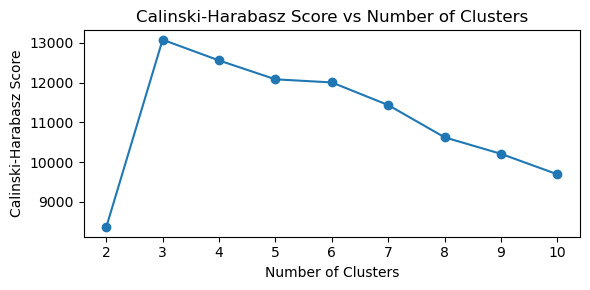

Optimal number of clusters based on Calinski-Harabasz Score: 3


In [62]:
n_clusters_range = range(1, 11)

# One of the methods to find the optimized no of the clusters: Calinski-Harabasz
ch_scores = []


for n_clusters in n_clusters_range:
    birch = Birch(n_clusters=n_clusters)
    labels_birch = birch.fit_predict(x)  # Using the original data (not scaled)
    
    # Calculate the Calinski-Harabasz score (only if n_clusters > 1)
    if n_clusters > 1:
        ch_scores.append(calinski_harabasz_score(x, labels_birch))
    else:
        ch_scores.append(np.nan)  # Not applicable for 1 cluster
    
  
# Plot Calinski-Harabasz Score 
plt.figure(figsize=(6, 3))

# Plot Calinski-Harabasz Score

plt.plot(n_clusters_range, ch_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Score vs Number of Clusters')


plt.tight_layout()
plt.show()

optimal_n_clusters_ch = n_clusters_range[np.nanargmax(ch_scores)]


print(f"Optimal number of clusters based on Calinski-Harabasz Score: {optimal_n_clusters_ch}")


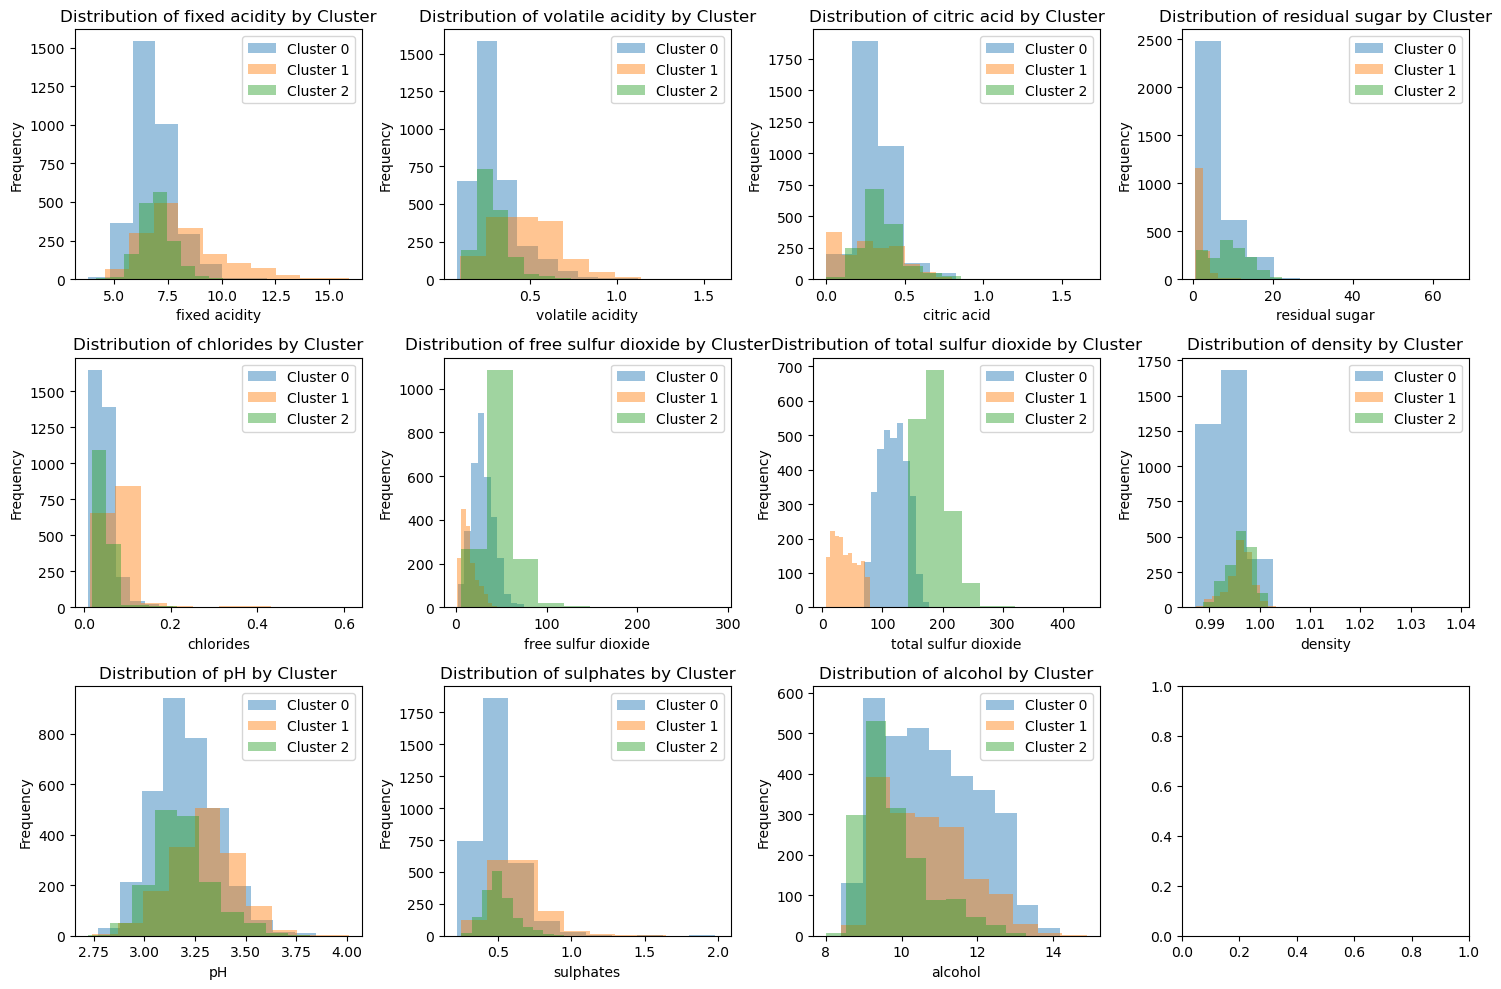

In [63]:
# Setting  the optimal number of clusters to 3:
optimal_n_clusters = 3

birch = Birch(n_clusters=optimal_n_clusters)
labels_birch = birch.fit_predict(x)  # Using the original data (not scaled)


combined_wine_data['Cluster'] = labels_birch

features = x.columns  

# Create subplots
fig, axes = plt.subplots(3, 4, figsize=(15, 10))  
axes = axes.flatten()  

for i, feature in enumerate(features):
    ax = axes[i]
    for cluster_num in range(optimal_n_clusters):
        subset = combined_wine_data[combined_wine_data['Cluster'] == cluster_num]
        ax.hist(subset[feature], alpha=0.45, label=f'Cluster {cluster_num}')
    ax.set_title(f'Distribution of {feature} by Cluster')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()
plt.show()

Similar results were achieved with less number of clusters and more computational efficiency. Discriminatory variables are similar with addition of residual sugar. 

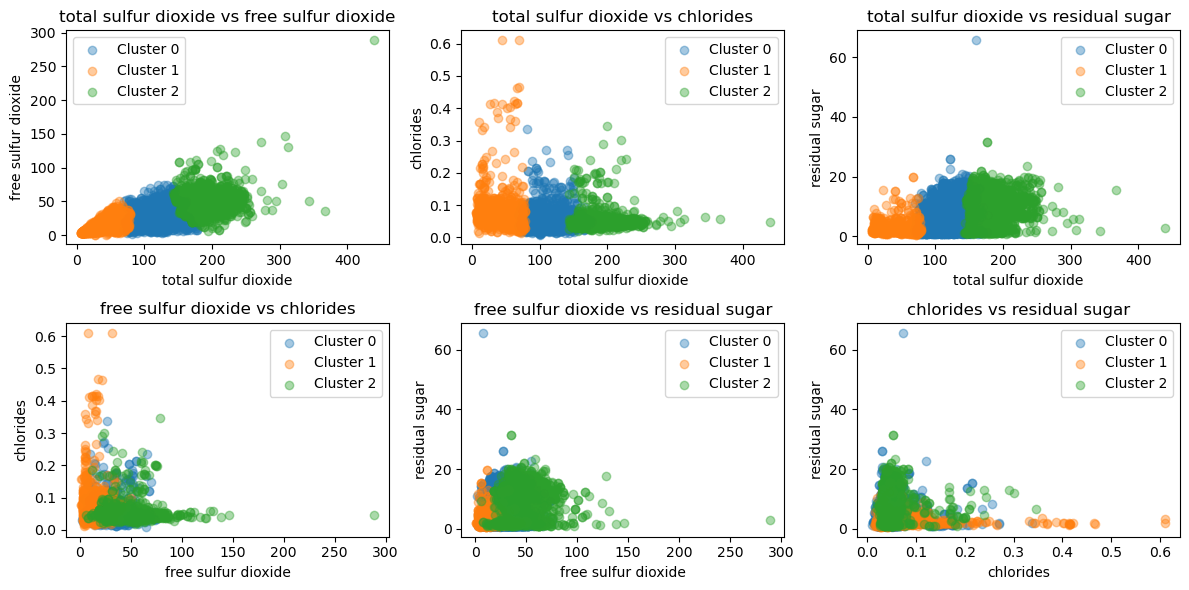

In [65]:
discriminatory_vars=['total sulfur dioxide', 'free sulfur dioxide', 'chlorides', 'residual sugar']

fig, axes = plt.subplots(2, 3, figsize=(12, 6)) 
axes = axes.flatten()  # 

plot_num = 0  
for i in range(len(discriminatory_vars)):
    for j in range(i + 1, len(discriminatory_vars)):
        ax = axes[plot_num]
       
        for cluster_num in range(optimal_n_clusters):
            subset = combined_wine_data[combined_wine_data['Cluster'] == cluster_num]
            ax.scatter(subset[discriminatory_vars[i]], subset[discriminatory_vars[j]], 
                       label=f'Cluster {cluster_num}', alpha=0.4)
        ax.set_xlabel(discriminatory_vars[i])
        ax.set_ylabel(discriminatory_vars[j])
        ax.set_title(f'{discriminatory_vars[i]} vs {discriminatory_vars[j]}')
        ax.legend()
        plot_num += 1


plt.tight_layout()
plt.show()

If we used 5 clusters as like in k-means:

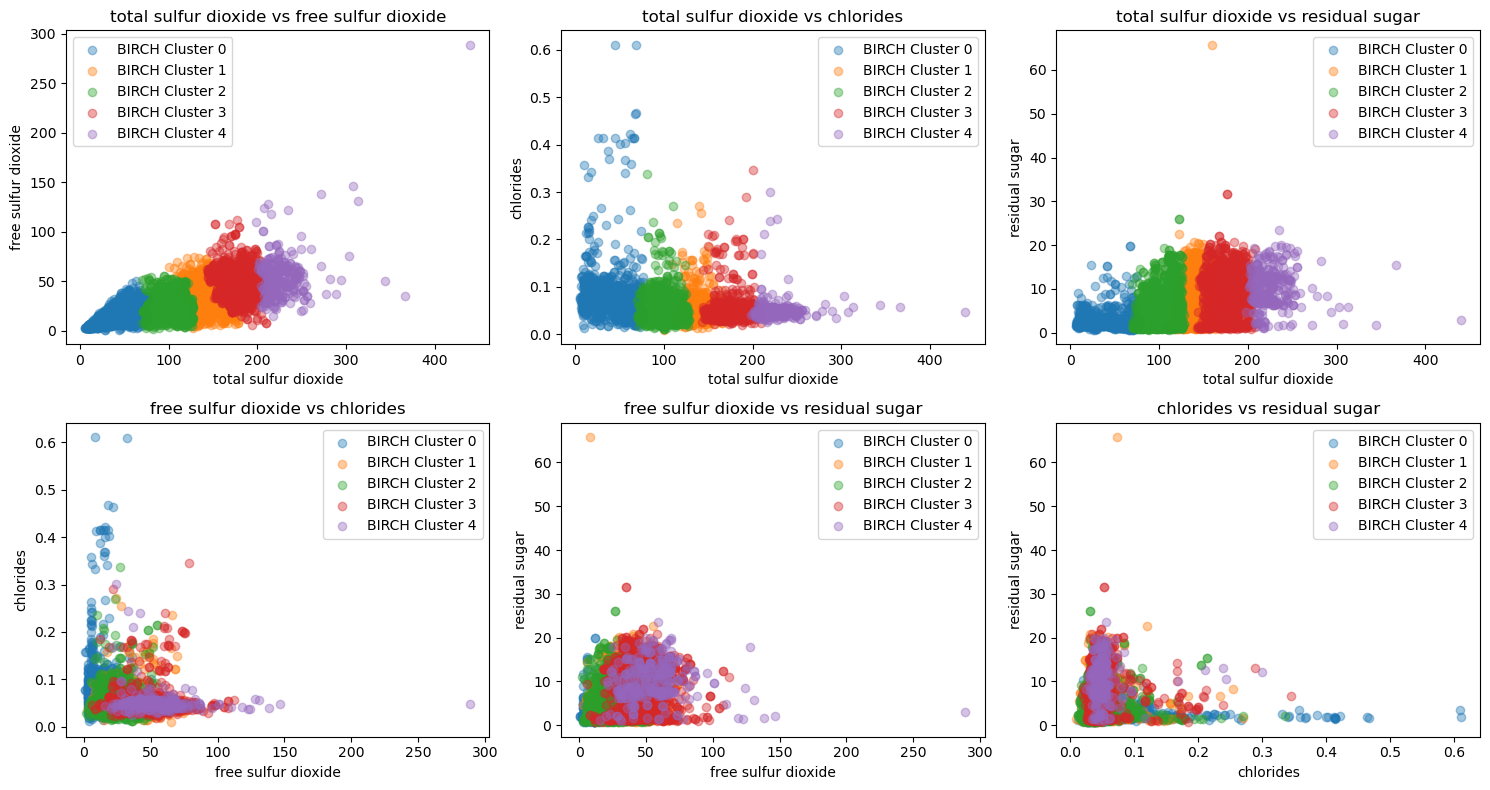

In [67]:
n_clusters_birch = 5
birch = Birch(n_clusters=n_clusters_birch)
birch_labels = birch.fit_predict(x)  


combined_wine_data['BIRCH_Cluster'] = birch_labels


discriminatory_vars = ['total sulfur dioxide', 'free sulfur dioxide', 'chlorides', 'residual sugar']

fig, axes = plt.subplots(2, 3, figsize=(15, 8))  
axes = axes.flatten()  

plot_num = 0  

for i in range(len(discriminatory_vars)):
    for j in range(i + 1, len(discriminatory_vars)):
        ax = axes[plot_num]
        
       
        for cluster_num in range(n_clusters_birch):
            subset = combined_wine_data[combined_wine_data['BIRCH_Cluster'] == cluster_num]
            ax.scatter(subset[discriminatory_vars[i]], subset[discriminatory_vars[j]], 
                       label=f'BIRCH Cluster {cluster_num}', alpha=0.4)
   
        ax.set_xlabel(discriminatory_vars[i])
        ax.set_ylabel(discriminatory_vars[j])
        ax.set_title(f'{discriminatory_vars[i]} vs {discriminatory_vars[j]}')
        ax.legend()
        plot_num += 1


plt.tight_layout()
plt.show()

Very similar results; just the cluster of the potential outliers slightly change; and the samples which are relatively more far from the cluster center points do not necessarily stay in that cluster, to make more circular clusters. Instead, they are placed inside the clusters which has closer cluster centers (e.g. right side samples in free sulfur dioxide vs chloride, comparison of Birch and kmeans methods).

### Prepared by NAZAN ALTUN.